## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [1]:
#Download a set of variables of interest:
import pandas as pd
#
var_list = ['year', 'wrkstat', 'industry', 'hrs2', 'prestige', 'wrkgovt', 'commute', 'marital', 'sphrs2', 'childs', 'age',
            'educ', 'sex', 'race', 'income'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row ind

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

The 15 data features that we chose from the General Social Survey (GSS) dataset were year, wrkstat, indsutry, hrs2, prestige, wrkgovt, commute, marital, sphrs2, childs, age, educ, sex, race, and income. The year feature is the GSS year that the entry was filed for the respondent. The wrkstat, is the labor force status, which includes if they are employed, unemployed, or not in the labor force. The industry feature corresponds to the type of job field that the respondent holds as of the industry codes in 1970. The hrs2 feature is the number of hours the respondent will work in a week. The prestige feature is the respondents occupational prestige score, which is on a scale from 10-90, which rates the level of their job status. The  wrkgovt, is the sector in which they work, whether that be in the government public employee or private employment. The commute feature is the travel time in minutes that the respondent takes to work each day. The marital feature is the marital status of the respondent. The sphrs2 feature is the number of hours on average the respondents spouse usually works in a week. Childs, is the number of children the respondent has. The age feature is how old the respondent is. The educ feature is a numeric code of the highest year of school completed, an entry of 12 would correspond to 12th grade, as 16 would correspond to an undergraduate degree. The sex feature is the respondent's sex. The race feature is the respondent's race. Lastly, the income feature is a range of the total family income of the respondent.

We chose these 15 variables because this selection of data covers a broad range of demographics and socioeconomic statuses, consistent with the General Social Survey's goal to have a wide representation of Americans.

Variables like year, labor force status (wrkstat), and industry  are crucial for understanding the changes in employment and workplace participation trends as well. Other variables such as prestige and government employment (wrkgovt) provide insights into work status and sector differences, as well as helps to understand the trend of differences in valued work status/sector over time. We also wanted to include data about family dynamics such as marital status (marital), number of children (childs), and total family income (income), to better understand how these family dynamics shift over time, or if there is a correlation observed between the other variables and family dynamics.

Demographics such as age, sex, and race provide more information about the individual respondent and help to understand the effects of the labor market on different groups. Education and family income also provide insights of the relationship between socioeconomic status the workforce.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Load the data into Pandas
df_gss = pd.read_csv(output_filename, low_memory=False)
df_gss.head()

,year,wrkstat,industry,hrs2,prestige,wrkgovt,commute,marital,sphrs2,childs,age,educ,sex,race,income
0,1972,working full time,department and mail order establishments,NaN,50.0,NaN,NaN,never married,NaN,0.0,23.0,16.0,female,white,NaN
1,1972,retired,newspaper publishing and printing,NaN,45.0,NaN,NaN,married,NaN,5.0,70.0,10.0,male,white,NaN
2,1972,working part time,"real estate, incl. real estate-insurance-law o...",NaN,44.0,NaN,NaN,married,NaN,4.0,48.0,12.0,female,white,NaN
3,1972,working full time,apparel and accessories,NaN,57.0,NaN,NaN,married,NaN,0.0,27.0,17.0,female,white,NaN
4,1972,keeping house,telephone (wire and radio),NaN,40.0,NaN,NaN,married,NaN,2.0,61.0,12.0,female,white,NaN


In [4]:
#Clean the data

#Clean workstatus variable
df_gss['wrkstat'].unique()
df_gss['wrkstat'] = df_gss['wrkstat'].str.strip().str.lower()

status_map = {
    "working full time": "Employed",
    "working part time": "Employed",
    "with a job, but not at work because of temporary illness, vacation, strike": "Not in Labor Force",
    "retired": "Not in Labor Force",
    "unemployed, laid off, looking for work": "Unemployed"
}

df_gss['wrkstat_clean'] = df_gss['wrkstat'].map(status_map)
df_gss['wrkstat_clean'].unique()

array(['Employed', 'Not in Labor Force', nan, 'Unemployed'], dtype=object)

In [5]:
#clean education level varible
df_gss['educ'].unique()

status_map2 = {
    1: "1st Grade",
    2: "2nd Grade",
    3: "3rd Grade",
    4: "4th Grade",
    5: "5th Grade",
    6: "6th Grade",
    7: "7th Grade",
    8: "8th Grade",
    9: "9th Grade",
    10: "10th Grade",
    11: "11th Grade",
    12: "12th Grade",
    16: "Undergraduate Degree",
    17: "Graduate Degree",
    18: "Graduate Degree",
    19: "Graduate Degree",
    20: "Graduate Degree",
}

df_gss['educ_obj'] = df_gss['educ'].map(status_map2)
df_gss['educ_obj'].unique()


array(['Undergraduate Degree', '10th Grade', '12th Grade',
       'Graduate Degree', nan, '6th Grade', '9th Grade', '8th Grade',
       '11th Grade', '7th Grade', '3rd Grade', '2nd Grade', '4th Grade',
       '5th Grade', '1st Grade'], dtype=object)

In [6]:
#View data
df_gss.head()

,year,wrkstat,industry,hrs2,prestige,wrkgovt,commute,marital,sphrs2,childs,age,educ,sex,race,income,wrkstat_clean,educ_obj
0,1972,working full time,department and mail order establishments,NaN,50.0,NaN,NaN,never married,NaN,0.0,23.0,16.0,female,white,NaN,Employed,Undergraduate Degree
1,1972,retired,newspaper publishing and printing,NaN,45.0,NaN,NaN,married,NaN,5.0,70.0,10.0,male,white,NaN,Not in Labor Force,10th Grade
2,1972,working part time,"real estate, incl. real estate-insurance-law o...",NaN,44.0,NaN,NaN,married,NaN,4.0,48.0,12.0,female,white,NaN,Employed,12th Grade
3,1972,working full time,apparel and accessories,NaN,57.0,NaN,NaN,married,NaN,0.0,27.0,17.0,female,white,NaN,Employed,Graduate Degree
4,1972,keeping house,telephone (wire and radio),NaN,40.0,NaN,NaN,married,NaN,2.0,61.0,12.0,female,white,NaN,NaN,12th Grade


**Numeric Summaries **

In [7]:
#Numeric summaries:
#Statistical summary of the survey participant's usual hours worked a week
print(df_gss['hrs2'].describe())

#What is the average commute time for the survey participants?
print(df_gss['commute'].mean())

#How many people are in each category of work status; group by sex
print(df_gss.groupby('sex')['wrkstat_clean'].value_counts())

#Compare work status with number of children
print(df_gss.groupby('childs')['wrkstat_clean'].value_counts())

#What are the most common industries?
print(df_gss['industry'].value_counts())

#What is the average number of hours worked per top 5 industries?
top_industries = df_gss['industry'].value_counts().head(5).index
print(df_gss[df_gss['industry'].isin(top_industries)].groupby('industry')['hrs2'].mean())

#What is the average education by work status?
print(df_gss.groupby('wrkstat')['educ'].mean())


count    1401.000000
mean       39.206281
std        13.549101
min         0.000000
25%        35.000000
50%        40.000000
75%        45.000000
max        89.000000
Name: hrs2, dtype: float64
20.245864661654135
sex     wrkstat_clean     
female  Employed              20780
        Not in Labor Force     6133
        Unemployed             1056
male    Employed              21855
        Not in Labor Force     6286
        Unemployed             1557
Name: count, dtype: int64
childs  wrkstat_clean     
0.0     Employed              13318
        Not in Labor Force     2373
        Unemployed             1021
1.0     Employed               7065
        Not in Labor Force     1727
        Unemployed              460
2.0     Employed              11016
        Not in Labor Force     3213
        Unemployed              498
3.0     Employed               6114
        Not in Labor Force     2303
        Unemployed              306
4.0     Employed               2815
        Not in Labor F

**Visualizations**

Text(0, 0.5, 'Prestige of Job')

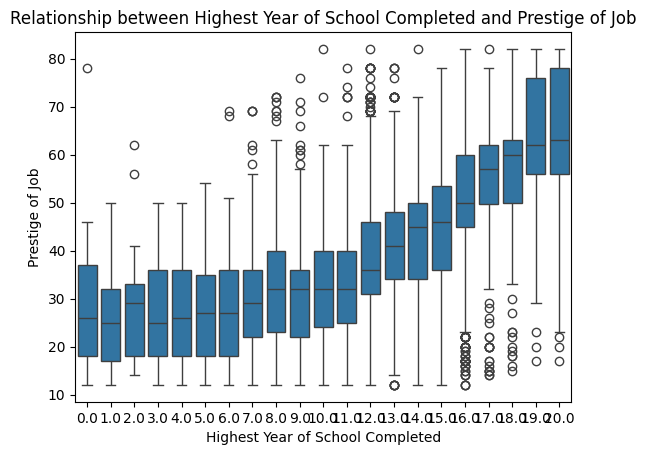

In [8]:
#Compare education level with prestige of job
sns.boxplot(data = df_gss, x='educ', y='prestige')
plt.title('Relationship between Highest Year of School Completed and Prestige of Job')
plt.xlabel('Highest Year of School Completed')
plt.ylabel('Prestige of Job')


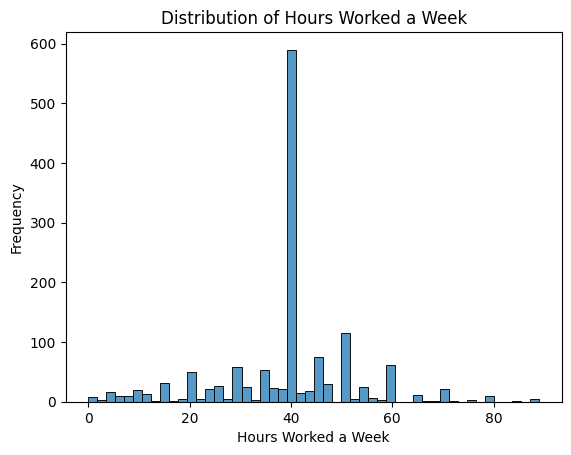

In [9]:
#What is the distribution of hours worked in a week among participant?
#What is the most common hours worked each week among participants?
sns.histplot(data=df_gss, x='hrs2')
plt.title('Distribution of Hours Worked a Week')
plt.xlabel('Hours Worked a Week')
plt.ylabel('Frequency')
plt.show()

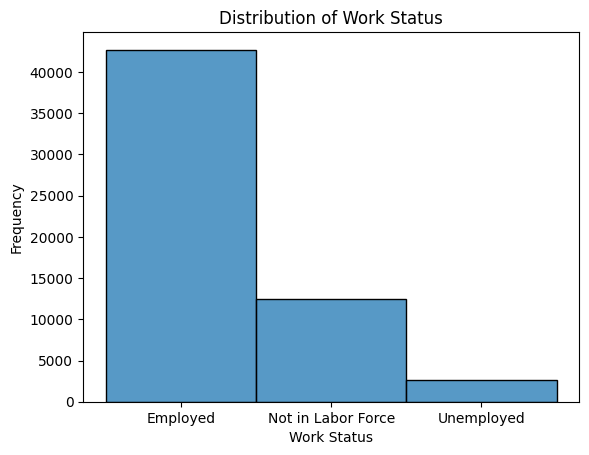

In [10]:
#What is the distribution of work status among participants?
sns.histplot(data=df_gss, x='wrkstat_clean')
plt.title('Distribution of Work Status')
plt.xlabel('Work Status')
plt.ylabel('Frequency')
plt.show()

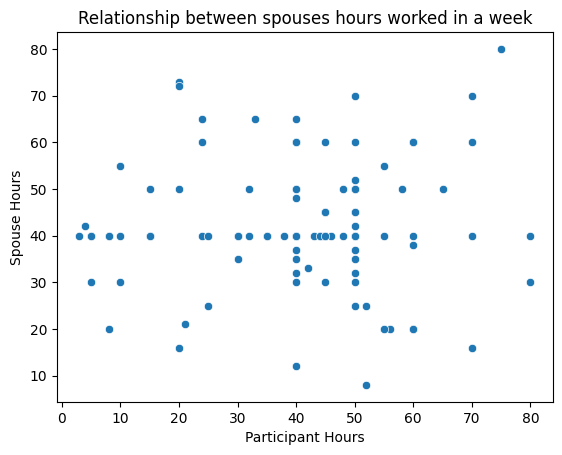

In [11]:
#Is there a relationship between hours worked in a week and spouse's hours worked in a week?
sns.scatterplot(data = df_gss, x= 'hrs2', y = 'sphrs2')
plt.title('Relationship between spouses hours worked in a week')
plt.xlabel('Participant Hours')
plt.ylabel('Spouse Hours')
plt.show()

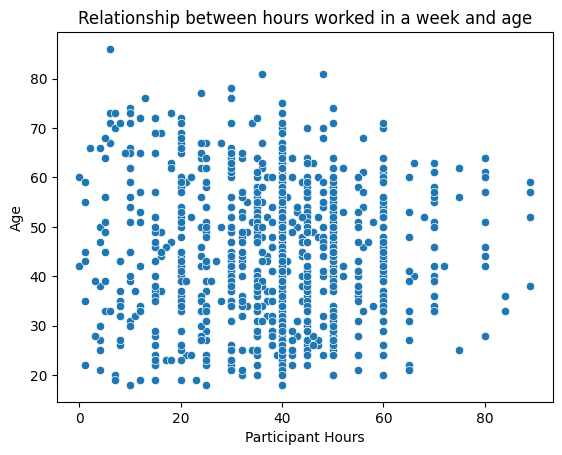

In [12]:
#Is there a relationship between hours worked and age?
sns.scatterplot(data = df_gss, x= 'hrs2', y = 'age')
plt.title('Relationship between hours worked in a week and age')
plt.xlabel('Participant Hours')
plt.ylabel('Age')
plt.show()

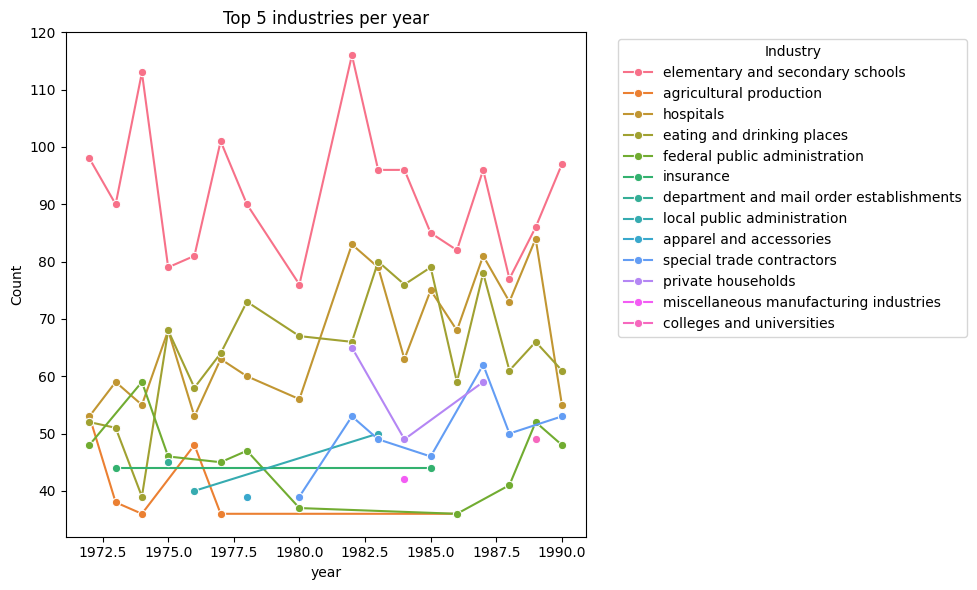

In [13]:
#Is their a relationship between the top 5 industries over time

counts = df_gss.groupby(["year", "industry"]).size().reset_index(name="count")

top5 = (
    counts.sort_values(["year", "count"], ascending=[True, False])
    .groupby("year")
    .head(5)
)

counts["is_top5"] = counts.set_index(["year","industry"]).index.isin(
    top5.set_index(["year","industry"]).index
)
plt.figure(figsize=(10,6))
sns.lineplot(
    data=top5,
    x="year", y="count", hue="industry", marker="o"
)
plt.title("Top 5 industries per year")
plt.ylabel("Count")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

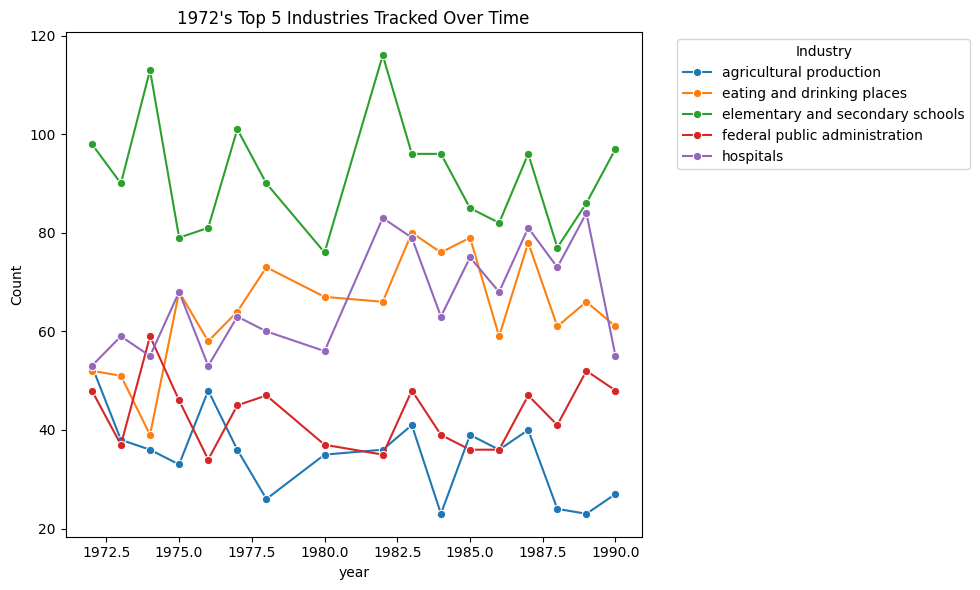

In [14]:
#Is there a relationship between the top 5 industries in 1972 and how they were tracked over time
counts_1972 = (
    df_gss[df_gss["year"] == 1972]
    .groupby("industry")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
    .head(5)
)

top5_1972 = counts_1972["industry"].tolist()
df_top5_1972 = df_gss[df_gss["industry"].isin(top5_1972)]
counts = df_top5_1972.groupby(["year", "industry"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.lineplot(
    data=counts,
    x="year", y="count", hue="industry", marker="o"
)
plt.title("1972's Top 5 Industries Tracked Over Time")
plt.ylabel("Count")
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Describe your findings:

We conducted a series of numerical summaries and visualizations using our chosen variables from the GSS Social Survey.

To begin, we examined a statistical summary of participants' typical weekly work hours. The statistics showed that the average was 39.2 hours per week. The 25th percentile was 35 hours, the median was 40, and the 75th percentile was 45. This suggests that most participants worked a standard full-time schedule, with some working overtime. Notably, the maximum reported was 89 hours per week, which is far beyond a typical 40-hour workweek. Next, we calculated the average commute time to get a sense of travel to work. On average, participants reported about a 20 minute commute. We also looked at work status by sex (employed, not in the labor force, unemployed). The summary showed that 20,780 females and 21,855 males were employed. Meanwhile, 6,133 females and 6,286 males reported not being in the labor force, and 1,056 females versus 1,557 males were unemployed.

We then considered how number of children effects work status. Respondents with no children were far more likely to be employed than those with children. For example, 13,318 participants with zero children were employed compared to just 6,114 among those with three children. We then identified the most common industries of employment. The top five were: elementary and secondary schools, hospitals, eating and drinking establishments, federal public administration, and special trade contractors. Finally, we looked at the average number of hours worked per week for each of these top five industries. We found that eating and drinking places had an average of about 34.5, elementary/secondary schools' average is 40.2, federal public administration is around 43.6, hospitals is 37.4, and special trade contractors' average is 43.5.

Our visualizations hoped to explore relationships between key variables. A boxplot of education level versus job prestige revealed a clear positive relationship: as years of education increased, so did job prestige. A histogram of weekly work hours highlighted that 40 hours was the most common work schedule. Another histogram of work status confirmed that “employed” was the most frequent category, followed by “not in the labor force,” and then “unemployed.”

We also wanted to test potential relationships between other variables. We created a scatterplot comparing weekly work hours and spouses’ weekly work hours. This showed little correlation, aside from a cluster around 40 hours on both axes, reflecting the prevalence of the standard full-time schedule. Similarly, a scatterplot of work hours and age showed no strong relationship, besides a cluster at 40 hours was prevalent again. Therefore, our analysis showed that some variables, such as education, job prestige, number of children, and work status showed relationships. However, other relationships, such as age and hours worked per week did not seem to be strongly correlated.

Another visualization we created, was looking at the top 5 industries, as both a function of how they changed over time, as well as comparing the top 5 industries in 1972 and how those progressed over time. In the first line plot, it is seen that throughout all the year the most frequently answered industry is primary and secondary school teacher. There were also growths in hospital jobs, up until 1990 wheen there was a sudden decline. Overall, agriculture and federal public administration had similar low levels in 1972 and as they progressed through the years, with some spikes and declines between, but overall steady progress. Looking into the 1972 top 5 jobs and how they progressed through the years you see similar trends where primary and secondary school teaching is the highest, with smaller dips and peaks in the other 4 industries across the years starting in 1972.